In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.python.platform import gfile
from tensorflow.python.ops import io_ops
import os
import tarfile
from tensorflow.python.ops import gen_audio_ops as audio_ops
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import tensorflow_io as tfio
from IPython.display import Audio

# Download data set

Download from: https://storage.cloud.google.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz - approx 2.3 GB

And then run

```
tar -xzf data_speech_commands_v0.02.tar.gz -C speech_data
```

In [3]:
# get the audio data from a file
audio_file_name = '../speech_data/marvin/0a9f9af7_nohash_2.wav'
raw_audio_data = io_ops.read_file(audio_file_name)
audio_data = tf.audio.decode_wav(raw_audio_data)
audio_data

DecodeWav(audio=<tf.Tensor: shape=(16000, 1), dtype=float32, numpy=
array([[0.00088501],
       [0.0017395 ],
       [0.00189209],
       ...,
       [0.00018311],
       [0.00115967],
       [0.00167847]], dtype=float32)>, sample_rate=<tf.Tensor: shape=(), dtype=int32, numpy=16000>)

In [4]:
IPython.display.Audio(audio_file_name)

In [5]:
# Load a wav file
def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

# Calculate and plot spectrogram for a wav audio file
def graph_spectrogram(wav_file):
    rate, data = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

array([[1.39788335e+02, 2.59312678e+02, 5.86949069e+02, ...,
        3.55571615e+00, 5.34208718e+02, 1.90429529e+01],
       [6.56127259e+01, 1.10689209e+02, 3.86688341e+02, ...,
        9.06598991e+02, 1.53524005e+03, 1.23275479e+02],
       [1.45947875e+01, 2.53336074e+01, 4.97712733e+00, ...,
        1.00751196e+03, 1.08190039e+03, 2.87486733e+02],
       ...,
       [4.11772762e-05, 2.57736860e-05, 7.96189712e-05, ...,
        3.67865046e-05, 3.92807689e-05, 1.56558856e-07],
       [1.04109464e-05, 1.04950190e-04, 1.10934554e-05, ...,
        4.83688369e-06, 4.00971255e-06, 1.76867224e-05],
       [9.69553318e-07, 7.69880087e-05, 1.34716387e-05, ...,
        1.95368347e-06, 1.43841412e-06, 8.62091487e-07]])

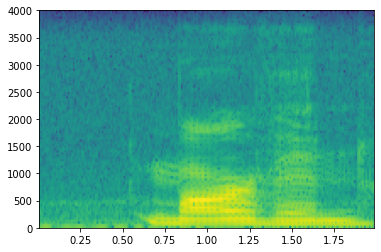

In [6]:
graph_spectrogram(audio_file_name)

In [7]:
get_wav_info(audio_file_name)

(16000, array([29, 57, 62, ...,  6, 38, 55], dtype=int16))

In [98]:
def show_spectrogram(file_name):
    sample_rate = 16000
    desired_samples = 16000 #1 sec audio
    raw_audio_data = io_ops.read_file(file_name)
    wav_decoder = audio_ops.decode_wav(raw_audio_data, desired_channels=1, desired_samples=desired_samples)

    #Computing the spectrograms
    spectrogram = audio_ops.audio_spectrogram(wav_decoder.audio,
                                                  window_size=320,
                                                  stride=160,
                                                  magnitude_squared=True)
    
    spectrogram = tf.nn.pool(
            input=tf.expand_dims(spectrogram, -1),
            window_shape=[1, 6],
            strides=[1, 6],
            pooling_type='AVG',
            padding='SAME')
    
    spectrogram = spectrogram/spectrogram.numpy().max()
    
    plt.imshow(tf.math.log(spectrogram[0]).numpy())
    plt.show()    
    return spectrogram

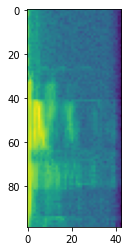

1.0 2.7603654e-11
(1, 99, 43, 1)
1.0 1.0


In [99]:
spectrogram = show_spectrogram('../speech_data/marvin/0a9f9af7_nohash_2.wav')
print(spectrogram.numpy().max(), spectrogram.numpy().min())
print(spectrogram.shape)
spectrogram = tf.keras.utils.normalize(spectrogram)
print(spectrogram.numpy().max(), spectrogram.numpy().min())

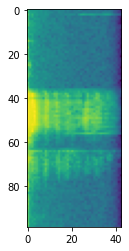

In [81]:
show_spectrogram('../speech_data/bed/3fb8c268_nohash_0.wav')

In [56]:
def show_mfcc(file_name):
    sample_rate = 16000
    desired_samples = 16000 #1 sec audio
    raw_audio_data = io_ops.read_file(file_name)
    wav_decoder = audio_ops.decode_wav(raw_audio_data, desired_channels=1, desired_samples=desired_samples)

    #Computing the spectrograms
    spectrogram = audio_ops.audio_spectrogram(wav_decoder.audio,
                                                  window_size=320,
                                                  stride=160,
                                                  magnitude_squared=True)

    mfcc = audio_ops.mfcc(
        spectrogram,
        wav_decoder.sample_rate)

    plt.imshow(mfcc[0])
    plt.show()

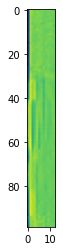

In [57]:
show_mfcc('../speech_data/marvin/0a9f9af7_nohash_2.wav')

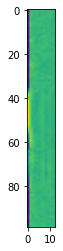

In [58]:
show_mfcc('../speech_data/bed/3fb8c268_nohash_0.wav')

In [26]:
audio = tfio.audio.AudioIOTensor(audio_file_name)
(audio.shape[0]==16000).numpy()

True

In [12]:
audio_tensor = tf.squeeze(audio[:], axis=[-1])
Audio(audio_tensor.numpy(), rate=audio.rate.numpy())

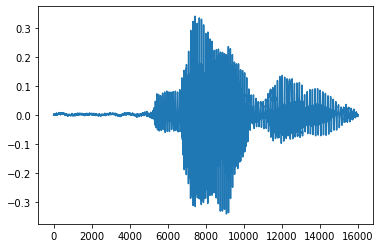

In [13]:
tensor = tf.cast(audio_tensor, tf.float32) / 32768.0

plt.figure()
plt.plot(tensor.numpy())

In [16]:
position = tfio.experimental.audio.trim(tensor, axis=0, epsilon=0.02)
print(position)

tf.Tensor([ 5276 15774], shape=(2,), dtype=int64)


In [19]:
(position[1] - position[0]).numpy()

10498

In [22]:
audio.shape[0].numpy()

16000